**There have been several attempts to predict the outcome of football games. This notebook tries to predict FIFA World Cup 2022 champion using simple attributes.**

**1. Data Info**

In [1]:
# Reading data

import pandas as pd
matches = pd.read_csv('international_matches.csv')
matches.shape

(23921, 25)

In [2]:
# First 5 rows

matches

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [3]:
import pandas as pd

# A function to get some info from the columns
def info(df):
    variables = []
    data_types = []
    count = []
    unique = []
    missing_values = []
    percent_missing = []
    
    for item in df.columns:
        variables.append(item)
        data_types.append(df[item].dtype)
        count.append(df[item].count())  # Menghitung jumlah non-missing values
        unique.append(df[item].nunique())  # Menghitung jumlah nilai unik
        missing_values.append(df[item].isna().sum())  # Jumlah nilai yang hilang
        percent_missing.append((df[item].isna().sum() / len(df)) * 100)  # Persentase nilai hilang

    output = pd.DataFrame({
        'variable': variables, 
        'data type': data_types,
        'non-missing count': count,
        'unique values': unique,
        'missing values': missing_values,
        'percent missing (%)': percent_missing
    })
        
    return output


In [4]:
info(matches)

,variable,data type,non-missing count,unique values,missing values,percent missing (%)
0,date,object,23921,5550,0,0.000000
1,home_team,object,23921,211,0,0.000000
2,away_team,object,23921,211,0,0.000000
3,home_team_continent,object,23921,6,0,0.000000
4,away_team_continent,object,23921,6,0,0.000000
5,home_team_fifa_rank,int64,23921,211,0,0.000000
6,away_team_fifa_rank,int64,23921,211,0,0.000000
7,home_team_total_fifa_points,int64,23921,1686,0,0.000000
8,away_team_total_fifa_points,int64,23921,1679,0,0.000000
9,home_team_score,int64,23921,21,0,0.000000


**2. Pre-Processing**

In [5]:
# Changing data types to correct ones

matches["date"] = pd.to_datetime(matches["date"])
matches = matches.replace({'shoot_out': {'Yes': True, 'No': False}})

C:\Users\USER\AppData\Local\Temp\ipykernel_8088\1158582892.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  matches = matches.replace({'shoot_out': {'Yes': True, 'No': False}})


In [6]:
world_cup_teams = ['Qatar', 'Netherlands', 'Senegal', 'Ecuador', 'England', 'USA', 'IR Iran', 'Wales',
                   'Argentina', 'Mexico', 'Poland', 'Saudi Arabia', 'France', 'Denmark', 'Tunisia', 'Australia',
                   'Spain', 'Germany', 'Japan', 'Costa Rica', 'Belgium', 'Croatia', 'Morocco', 'Canada',
                   'Brazil', 'Switzerland', 'Serbia', 'Cameroon', 'Portugal', 'Uruguay', 'Korea Republic', 'Ghana']

In [7]:
# # Removing irrelevant matches
# # Keep matches between teams of World Cup, their matches with teams that have ranking less than 100
# # Keep matches between teams with ranking less than 50

# matches = matches[((matches['home_team'].isin(world_cup_teams) & matches['away_team'].isin(world_cup_teams)) |
#                    (matches['home_team'].isin(world_cup_teams) & (matches['away_team_fifa_rank'] <= 100)) |
#                    ((matches['home_team_fifa_rank'] <= 100) & matches['away_team'].isin(world_cup_teams))|
#                    ((matches['home_team_fifa_rank'] <= 50) & (matches['away_team_fifa_rank'] <= 50)))]
# matches.reset_index(drop=True, inplace=True)
# matches.shape

In [8]:
# No duplicate rows

matches.duplicated().sum()

0

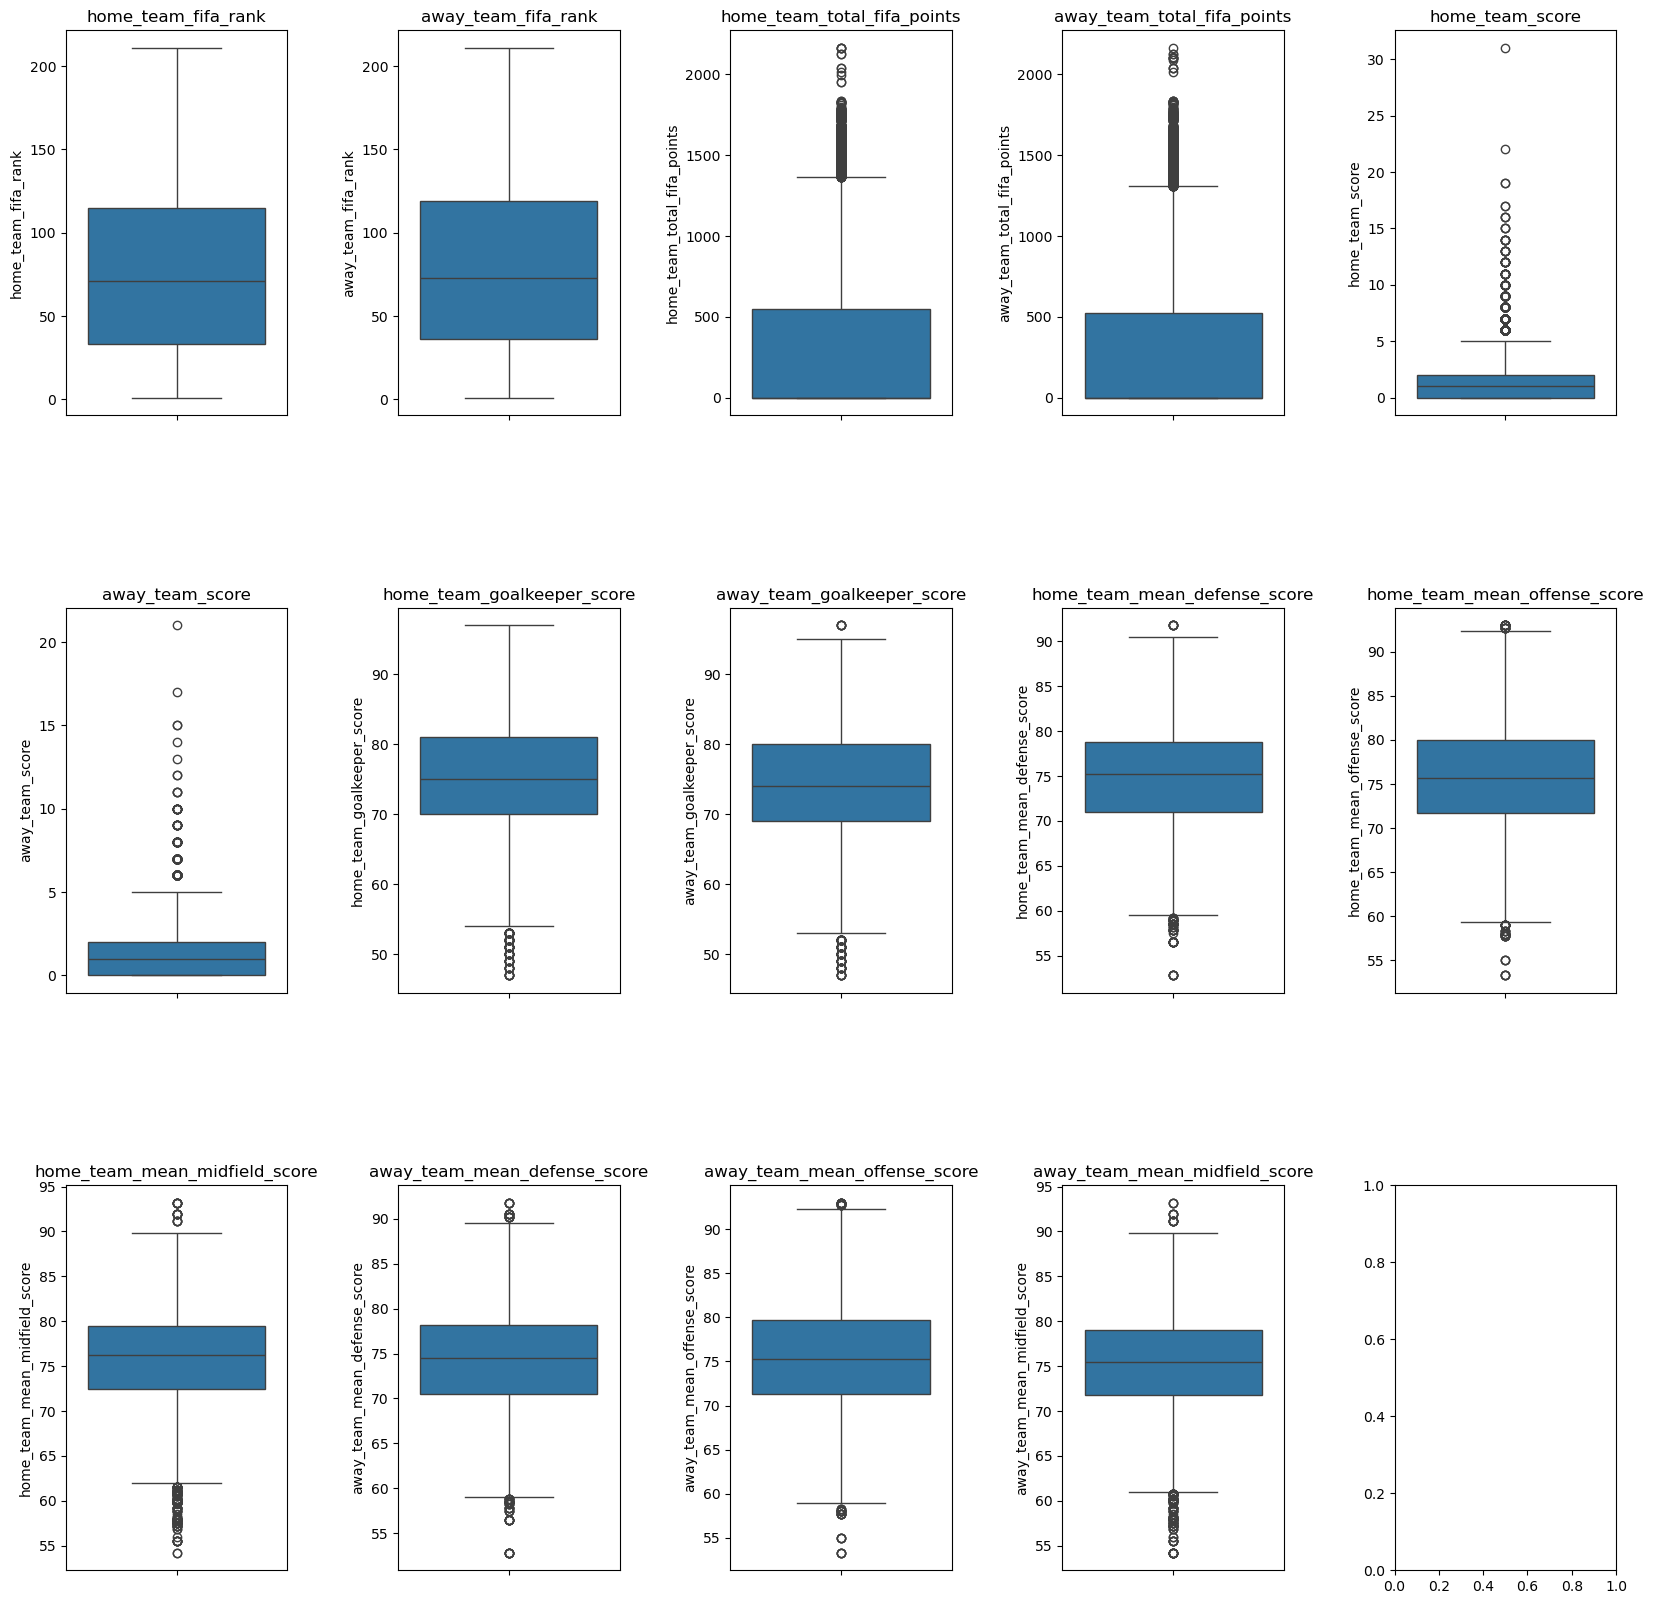

In [9]:
# Outliers of numerical variables
# There is no far outlier that may affect the process significantly.
# Therefore, it would be better to keep all records in order not to lose any meaningful data.

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
numeric_cols = matches.select_dtypes(include='number').columns

for i, ax in enumerate(axs.flatten()):
    if i < len(numeric_cols):
        sns.boxplot(y=matches[numeric_cols[i]], ax=ax)
        ax.set_title(numeric_cols[i])
    else:
        break

plt.show()

In [10]:
# Creating features for training

matches["goal_difference"] = matches["home_team_score"] - matches["away_team_score"]
matches["rank_difference"] = matches["home_team_fifa_rank"] - matches["away_team_fifa_rank"]
matches['Friendly'] = matches['tournament'] == 'Friendly'
matches['year'] = matches['date'].dt.year

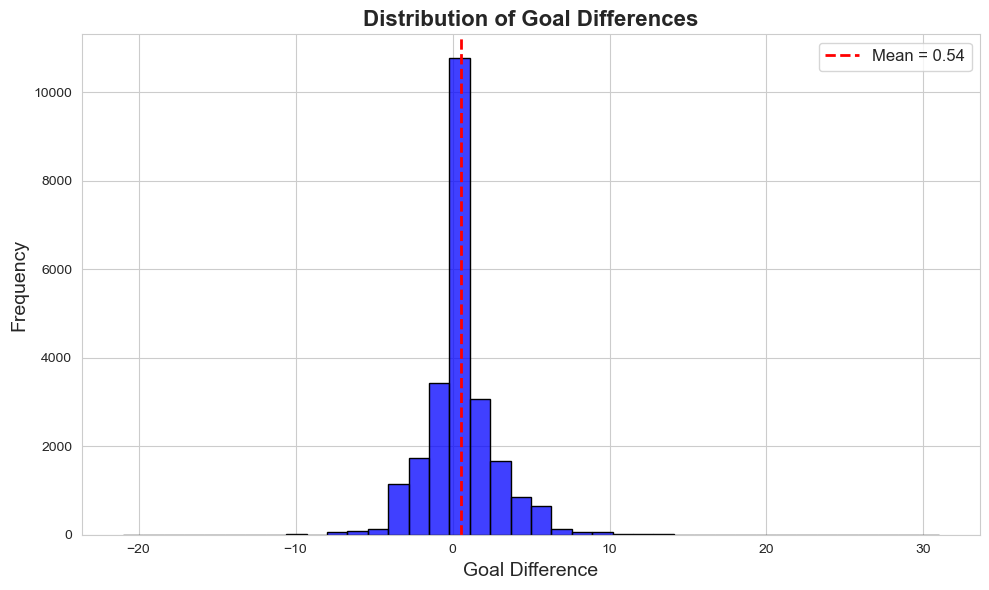

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style dan tema Seaborn
sns.set_style("whitegrid")
sns.set_palette("muted")

# Membuat histogram dengan Seaborn
plt.figure(figsize=(10, 6))  # Ukuran plot
sns.histplot(matches["goal_difference"], bins=40, color="blue", edgecolor="black")

# Menambahkan judul dan label
plt.title("Distribution of Goal Differences", fontsize=16, fontweight="bold")
plt.xlabel("Goal Difference", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Menambahkan garis vertikal rata-rata
mean_goal_difference = matches["goal_difference"].mean()
plt.axvline(mean_goal_difference, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_goal_difference:.2f}")

# Menambahkan legenda
plt.legend(fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


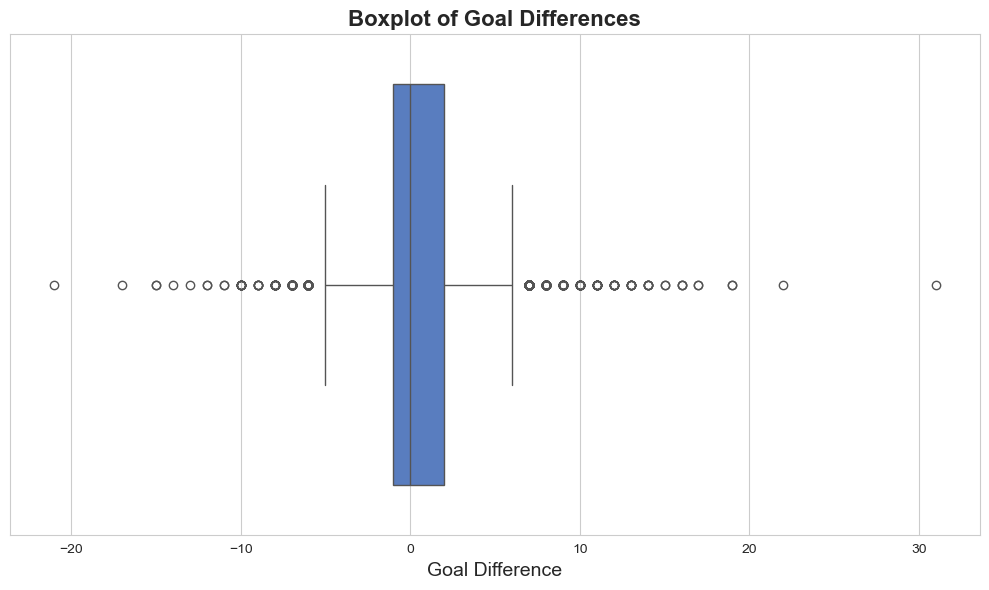

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style dan tema Seaborn
sns.set_style("whitegrid")
sns.set_palette("muted")

# Membuat boxplot dengan Seaborn
plt.figure(figsize=(10, 6))  # Ukuran plot
sns.boxplot(x=matches["goal_difference"])

# Menambahkan judul dan label
plt.title("Boxplot of Goal Differences", fontsize=16, fontweight="bold")
plt.xlabel("Goal Difference", fontsize=14)

# Menampilkan plot
plt.tight_layout()
plt.show()


In [13]:
import numpy as np

# Hitung Q1, Q3, dan IQR
Q1 = matches["goal_difference"].quantile(0.25)
Q3 = matches["goal_difference"].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers (goal_difference di atas batas atas)
outliers = matches[matches["goal_difference"] > upper_bound]
print("Outliers in Goal Difference:")
print(outliers.loc[:, ["home_team", "away_team", "tournament", "goal_difference"]])

# Hapus baris yang berada di luar batas bawah dan atas
matches = matches[(matches["goal_difference"] <= upper_bound) & (matches["goal_difference"] >= lower_bound)]


Outliers in Goal Difference:
                 home_team       away_team                    tournament  \
16                 Bolivia       Venezuela  FIFA World Cup qualification   
128                    USA  Cayman Islands                      Friendly   
160                    USA     El Salvador                      Friendly   
659               Portugal   Liechtenstein       UEFA Euro qualification   
788                  Gabon           Benin                      Friendly   
...                    ...             ...                           ...   
23193              Germany   Liechtenstein  FIFA World Cup qualification   
23231               France      Kazakhstan  FIFA World Cup qualification   
23536  Trinidad and Tobago        Barbados                      Friendly   
23614               Norway         Armenia                      Friendly   
23892            Indonesia           Nepal   AFC Asian Cup qualification   

       goal_difference  
16                   7  
128     

In [14]:
matches_df =  matches[['home_team_total_fifa_points', 'away_team_total_fifa_points', 'rank_difference', "goal_difference"]]
matches_df

,home_team_total_fifa_points,away_team_total_fifa_points,rank_difference,goal_difference
0,0,0,37,2
1,0,0,-6,0
2,0,0,-59,5
3,0,0,-21,1
4,0,0,62,-2
...,...,...,...,...
23916,932,1040,27,1
23917,895,1105,57,-2
23918,1526,1387,-32,0
23919,1553,1499,-12,-3


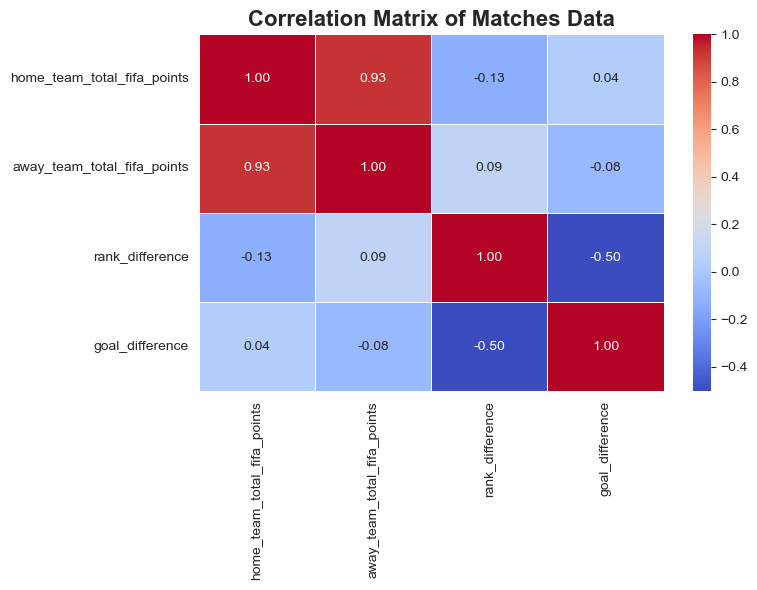

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = matches_df.corr()

# Menampilkan matriks korelasi sebagai heatmap
plt.figure(figsize=(8, 6))  # Ukuran heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Menambahkan judul
plt.title("Correlation Matrix of Matches Data", fontsize=16, fontweight="bold")

# Menampilkan heatmap
plt.tight_layout()
plt.show()


In [16]:
# Setting input and output varibles
# Positive goal difference shows that the home team has won the game.
# Negative goal differnce is indicative of away team victory.

matches_X = matches[['home_team_total_fifa_points', 'away_team_total_fifa_points', 'rank_difference']]
matches_y = matches[['goal_difference']]

**3. Training**

#### REGRESI

3.1 Decision Tree

In [17]:
# Decision Tree Root Mean Squared Error using 10-fold Cross Validation

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

decision_tree_reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(decision_tree_reg, matches_X, matches_y, cv=10, scoring='neg_mean_squared_error')
decision_tree_rmse_scores = np.sqrt(-scores)
print('Decision Tree Regression RMSE Scores:', decision_tree_rmse_scores)
print('Decision Tree Regression RMSE Mean:', decision_tree_rmse_scores.mean())

Decision Tree Regression RMSE Scores: [1.71779072 1.63891623 1.72766447 1.66630353 1.65735292 1.70560291
 2.34048952 2.27183378 2.26341554 2.32606636]
Decision Tree Regression RMSE Mean: 1.9315435979625097


3.2 Random Forest

In [18]:
# Random Forest Root Mean Squared Error using 10-fold Cross Validation
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_array = np.array(matches_y)
y_array = y_array.ravel()
scores = cross_val_score(random_forest_model, matches_X, y_array, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

RMSE Scores: [1.71719848 1.63787501 1.72672486 1.66641465 1.6501938  1.67224506
 1.74988898 1.74392864 1.75520048 1.75965614]
Mean RMSE: 1.7079326109959438


In [19]:
# Random Forest had a better performance
# Random Forest best performance based on a greedy search that I did

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

random_forest_model = RandomForestRegressor(n_estimators = 50, max_depth = 5, min_samples_split = 2, min_samples_leaf = 4)
y_array = np.array(matches_y)
y_array = y_array.ravel()
scores = cross_val_score(random_forest_model, matches_X, y_array, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

RMSE Scores: [1.69086661 1.61621604 1.71251308 1.64163347 1.63298742 1.65497389
 1.61230161 1.62852877 1.63017389 1.61210109]
Mean RMSE: 1.6432295869975306


In [20]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Inisialisasi model XGBoost Regressor
xgboost_model = XGBRegressor(n_estimators=50, max_depth=5, learning_rate=0.12, min_child_weight=4, random_state=42)

# Pastikan y_array diubah menjadi array 1D
y_array = np.array(matches_y).ravel()

# Evaluasi model menggunakan cross-validation
scores = cross_val_score(xgboost_model, matches_X, y_array, cv=10, scoring='neg_mean_squared_error')

# Hitung RMSE
rmse_scores = np.sqrt(-scores)

# Output hasil
print("RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())


RMSE Scores: [1.69089048 1.61663889 1.71106092 1.64003106 1.63156391 1.65538356
 1.61811505 1.63216466 1.63576618 1.63543411]
Mean RMSE: 1.646704881916829


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Inisialisasi model Linear Regression
linear_regression_model = LinearRegression()

# Pastikan y_array berbentuk array 1D
y_array = np.array(matches_y).ravel()

# Evaluasi model menggunakan cross-validation
scores = cross_val_score(linear_regression_model, matches_X, y_array, cv=10, scoring='neg_mean_squared_error')

# Hitung RMSE
rmse_scores = np.sqrt(-scores)

# Output hasil evaluasi
print("RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())


RMSE Scores: [1.69068502 1.61813397 1.71360852 1.63798304 1.63314835 1.65464017
 1.61043486 1.62729035 1.63281795 1.61522213]
Mean RMSE: 1.6433964357452797


In [22]:
# Training the model

random_forest_model.fit(matches_X, y_array)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_estimators=50)

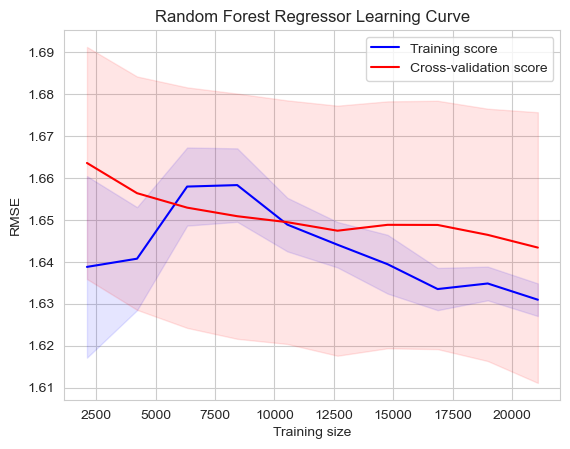

In [23]:
# Learning Curve

from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes_abs, train_scores, test_scores = learning_curve(
    random_forest_model, matches_X, y_array, train_sizes=train_sizes, cv=10, scoring='neg_root_mean_squared_error')

train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes_abs, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes_abs, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes_abs, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.title('Random Forest Regressor Learning Curve')
plt.xlabel('Training size')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.show()

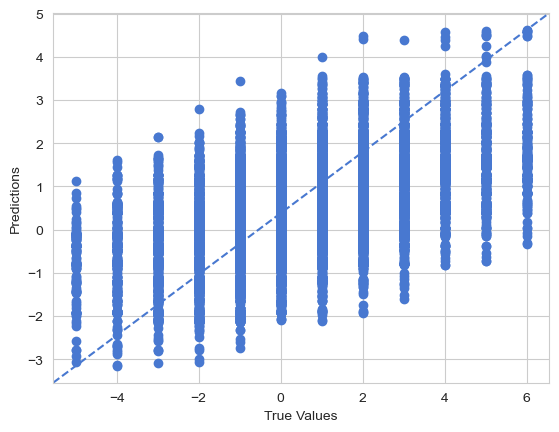

In [24]:
# Model prediction

y_pred = random_forest_model.predict(matches_X)
plt.scatter(matches_y, y_pred)
plt.plot([0, 1], [0, 1], '--', transform=plt.gca().transAxes)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

**4. Prediction**

In [25]:
world_cup_groups = {'A': ['Qatar', 'Netherlands', 'Senegal', 'Ecuador'],
                    'B': ['England', 'USA', 'IR Iran', 'Wales'],
                    'C': ['Argentina', 'Mexico', 'Poland', 'Saudi Arabia'],
                    'D': ['France', 'Denmark', 'Tunisia', 'Australia'],
                    'E': ['Spain', 'Germany', 'Japan', 'Costa Rica'],
                    'F': ['Belgium', 'Croatia', 'Morocco', 'Canada'],
                    'G': ['Brazil', 'Switzerland', 'Serbia', 'Cameroon'],
                    'H': ['Portugal', 'Uruguay', 'Korea Republic', 'Ghana']}

In [26]:
# Get teams info

team_info = []
for team in world_cup_teams:
  filtered_matches = matches[(matches['home_team'] == team) | (matches['away_team'] == team)]
  sorted_matches = filtered_matches.sort_values('date', ascending=False)
  if sorted_matches.iloc[0]['home_team'] == team:
    info = (team, sorted_matches.iloc[0]['home_team_total_fifa_points'], sorted_matches.iloc[0]['home_team_fifa_rank'])
  else:
    info = (team, sorted_matches.iloc[0]['away_team_total_fifa_points'], sorted_matches.iloc[0]['away_team_fifa_rank'])
  team_info.append(info)

In [27]:
team_info_df = pd.DataFrame(team_info, columns=['team', 'point', 'rank'])


In [28]:
team_info_df

,team,point,rank
0,Qatar,1437,52
1,Netherlands,1658,10
2,Senegal,1584,20
3,Ecuador,1452,46
4,England,1761,5
5,USA,1633,15
6,IR Iran,1564,21
7,Wales,1588,18
8,Argentina,1765,4
9,Mexico,1658,9


In [29]:
# Creating matches data

import itertools
FWC_matches = []

for group, teams in world_cup_groups.items():
    team_combinations = list(itertools.combinations(teams, 2))
    for team in team_combinations:
        team0_point = team_info_df.loc[team_info_df['team'] == team[0], 'point'].values[0]
        team0_name = team_info_df.loc[team_info_df['team']== team[0], "team"].values[0]
        team1_point = team_info_df.loc[team_info_df['team'] == team[1], 'point'].values[0]
        team1_name = team_info_df.loc[team_info_df['team']== team[1], "team"].values[0]
        team0_rank = team_info_df.loc[team_info_df['team'] == team[0], 'rank'].values[0]
        team1_rank = team_info_df.loc[team_info_df['team'] == team[1], 'rank'].values[0]
        mt = (team0_name, team0_point, team1_name, team1_point, team0_rank - team1_rank)
        FWC_matches.append(mt)

In [30]:
FWC_matches

[('Qatar', 1437, 'Netherlands', 1658, 42),
 ('Qatar', 1437, 'Senegal', 1584, 32),
 ('Qatar', 1437, 'Ecuador', 1452, 6),
 ('Netherlands', 1658, 'Senegal', 1584, -10),
 ('Netherlands', 1658, 'Ecuador', 1452, -36),
 ('Senegal', 1584, 'Ecuador', 1452, -26),
 ('England', 1761, 'USA', 1633, -10),
 ('England', 1761, 'IR Iran', 1564, -16),
 ('England', 1761, 'Wales', 1588, -13),
 ('USA', 1633, 'IR Iran', 1564, -6),
 ('USA', 1633, 'Wales', 1588, -3),
 ('IR Iran', 1564, 'Wales', 1588, 3),
 ('Argentina', 1765, 'Mexico', 1658, -5),
 ('Argentina', 1765, 'Poland', 1544, -22),
 ('Argentina', 1765, 'Saudi Arabia', 1444, -45),
 ('Mexico', 1658, 'Poland', 1544, -17),
 ('Mexico', 1658, 'Saudi Arabia', 1444, -40),
 ('Poland', 1544, 'Saudi Arabia', 1444, -23),
 ('France', 1789, 'Denmark', 1653, -8),
 ('France', 1789, 'Tunisia', 1499, -32),
 ('France', 1789, 'Australia', 1462, -39),
 ('Denmark', 1653, 'Tunisia', 1499, -24),
 ('Denmark', 1653, 'Australia', 1462, -31),
 ('Tunisia', 1499, 'Australia', 1462, -7

In [31]:
FWC_matches_df = pd.DataFrame(FWC_matches, columns=['home_team','home_team_total_fifa_points','away_team', 'away_team_total_fifa_points',
                                                    'rank_difference'])

In [32]:
predictor = ["home_team_total_fifa_points", "away_team_total_fifa_points", "rank_difference"]

hasil = random_forest_model.predict(FWC_matches_df[predictor])
print(hasil)


[-0.75419133 -0.65893283  0.26340666  0.63037427  1.40865479  1.16254757
  0.6394809   1.51152951  0.7206643   0.63885626  0.55655036  0.08134451
  0.53298402  1.70974183  1.50756214  1.29782097  1.45260356  0.64827392
  0.62032395  1.54780382  1.60268852  1.71441272  1.41255626  0.48257047
  0.53298402  1.29782097  1.71441272  0.63761707  1.28367705  0.47019718
  1.03027535  1.85830738  1.53148344  0.62783385  0.88647203  0.5278534
  0.68976451  2.20466831  1.48416201  0.63761707  1.21126881  0.48127231
  0.53327909  1.51113988  1.59543694  1.36027298  1.46277599  1.10530314]


In [33]:
FWC_matches_df["Hasil"] = hasil
FWC_matches_df


,home_team,home_team_total_fifa_points,away_team,away_team_total_fifa_points,rank_difference,Hasil
0,Qatar,1437,Netherlands,1658,42,-0.754191
1,Qatar,1437,Senegal,1584,32,-0.658933
2,Qatar,1437,Ecuador,1452,6,0.263407
3,Netherlands,1658,Senegal,1584,-10,0.630374
4,Netherlands,1658,Ecuador,1452,-36,1.408655
5,Senegal,1584,Ecuador,1452,-26,1.162548
6,England,1761,USA,1633,-10,0.639481
7,England,1761,IR Iran,1564,-16,1.511530
8,England,1761,Wales,1588,-13,0.720664
9,USA,1633,IR Iran,1564,-6,0.638856


In [34]:
FWC_matches_df.groupby(by="home_team").agg({
    'Hasil':'sum'
}).sort_values(by="Hasil", ascending=False)

,Hasil
home_team,
Belgium,4.420066
Brazil,4.378595
France,3.770816
Argentina,3.750288
Portugal,3.639856
Spain,3.545218
Denmark,3.126969
England,2.871675
Uruguay,2.823049


**Groups Ranking based on prediction**

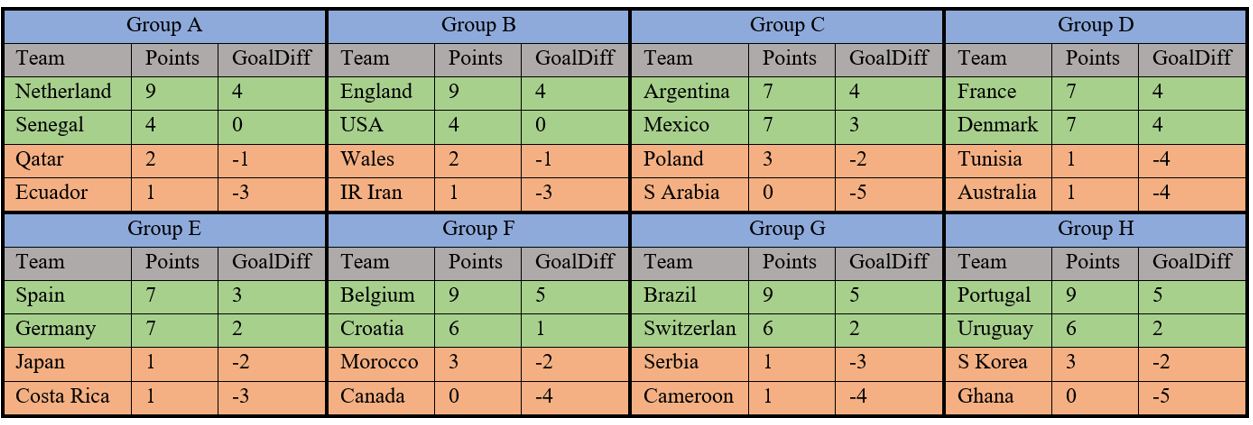

####  Klasifikasi

In [35]:
matches_y["win"] = np.where(matches_y["goal_difference"] >= 0, 1, 0)
matches_y_clas = matches_y["win"]
matches_y_clas

C:\Users\USER\AppData\Local\Temp\ipykernel_8088\2033006368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_y["win"] = np.where(matches_y["goal_difference"] >= 0, 1, 0)


0        1
1        1
2        1
3        1
4        0
        ..
23916    1
23917    0
23918    1
23919    0
23920    1
Name: win, Length: 23436, dtype: int32

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Contoh dataset
# X: Fitur, Y: Target
# X, Y harus sudah didefinisikan sebelum kode ini

# 3. Split dataset ke train dan test
X_train, X_test, y_train, y_test = train_test_split(matches_X, matches_y_clas, test_size=0.3, random_state=42)

# 4. Inisialisasi model XGBoost
model_xg = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

# 5. Melatih model
model_xg.fit(X_train, y_train)

# 6. Prediksi pada data test
y_pred = model_xg.predict(X_test)

# 7. Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 8. Print hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7462665339212061
Precision: 0.7666557805355977
Recall: 0.9297029702970298
F1 Score: 0.8403436549131913


d:\Anacondas\envs\newenv2\lib\site-packages\xgboost\core.py:158: UserWarning: [07:14:27] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Split dataset ke train dan test
# Misalkan X adalah fitur dan y adalah target
X_train, X_test, y_train, y_test = train_test_split(matches_X, matches_y_clas, test_size=0.3, random_state=42)

# 2. Inisialisasi model Regresi Logistik
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# 3. Melatih model
logistic_model.fit(X_train, y_train)

# 4. Prediksi pada data test
y_pred = logistic_model.predict(X_test)

# 5. Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Ganti ke 'macro' jika multiclass
recall = recall_score(y_test, y_pred, average='binary')        # Ganti ke 'macro' jika multiclass
f1 = f1_score(y_test, y_pred, average='binary')                # Ganti ke 'macro' jika multiclass

# 6. Print hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.7543734888351585
Precision: 0.7675954259945241
Recall: 0.9437623762376237
F1 Score: 0.8466115996092015


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# 4. Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 5. Melatih model
model.fit(X_train, y_train)

# 6. Prediksi pada data test
y_pred = model.predict(X_test)

# 7. Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# 8. Print hasil evaluasi
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7353150334234106
Precision: 0.7635101636093208
Recall: 0.9148514851485149
F1 Score: 0.8323574452752004


In [39]:
predictor = ["home_team_total_fifa_points", "away_team_total_fifa_points", "rank_difference"]

hasil = model.predict_proba(FWC_matches_df[predictor])
print(hasil)


[[0.44 0.56]
 [0.76 0.24]
 [0.05 0.95]
 [0.12 0.88]
 [0.01 0.99]
 [0.3  0.7 ]
 [0.03 0.97]
 [0.03 0.97]
 [0.1  0.9 ]
 [0.06 0.94]
 [0.38 0.62]
 [0.31 0.69]
 [0.44 0.56]
 [0.03 0.97]
 [0.11 0.89]
 [0.19 0.81]
 [0.   1.  ]
 [0.18 0.82]
 [0.78 0.22]
 [0.14 0.86]
 [0.25 0.75]
 [0.05 0.95]
 [0.01 0.99]
 [0.15 0.85]
 [0.43 0.57]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.07 0.93]
 [0.19 0.81]
 [0.14 0.86]
 [0.02 0.98]
 [0.21 0.79]
 [0.09 0.91]
 [0.27 0.73]
 [0.18 0.82]
 [0.19 0.81]
 [0.02 0.98]
 [0.18 0.82]
 [0.01 0.99]
 [0.17 0.83]
 [0.25 0.75]
 [0.65 0.35]
 [0.04 0.96]
 [0.04 0.96]
 [0.03 0.97]
 [0.06 0.94]
 [0.07 0.93]]


In [40]:
# Ambil probabilitas hanya untuk kelas ke-1
class_1_probabilities = hasil[:, 1]  # Kolom kedua dari array

# Print hasil probabilitas untuk kelas ke-1
print(class_1_probabilities)


[0.56 0.24 0.95 0.88 0.99 0.7  0.97 0.97 0.9  0.94 0.62 0.69 0.56 0.97
 0.89 0.81 1.   0.82 0.22 0.86 0.75 0.95 0.99 0.85 0.57 1.   1.   1.
 0.93 0.81 0.86 0.98 0.79 0.91 0.73 0.82 0.81 0.98 0.82 0.99 0.83 0.75
 0.35 0.96 0.96 0.97 0.94 0.93]


In [41]:
FWC_matches_df["Prob"] = class_1_probabilities
FWC_matches_df
#.to_csv("Hasil_pertandingan.csv")

,home_team,home_team_total_fifa_points,away_team,away_team_total_fifa_points,rank_difference,Hasil,Prob
0,Qatar,1437,Netherlands,1658,42,-0.754191,0.56
1,Qatar,1437,Senegal,1584,32,-0.658933,0.24
2,Qatar,1437,Ecuador,1452,6,0.263407,0.95
3,Netherlands,1658,Senegal,1584,-10,0.630374,0.88
4,Netherlands,1658,Ecuador,1452,-36,1.408655,0.99
5,Senegal,1584,Ecuador,1452,-26,1.162548,0.70
6,England,1761,USA,1633,-10,0.639481,0.97
7,England,1761,IR Iran,1564,-16,1.511530,0.97
8,England,1761,Wales,1588,-13,0.720664,0.90
9,USA,1633,IR Iran,1564,-6,0.638856,0.94


In [42]:

# team_combinations = list(itertools.combinations(world_cup_teams, 2))  # Semua kombinasi tim (tanpa grup)
# for team in team_combinations:
#     team0_point = team_info_df.loc[team_info_df['team'] == team[0], 'point'].values[0]
#     team0_name = team_info_df.loc[team_info_df['team'] == team[0], "team"].values[0]
#     team1_point = team_info_df.loc[team_info_df['team'] == team[1], 'point'].values[0]
#     team1_name = team_info_df.loc[team_info_df['team'] == team[1], "team"].values[0]
#     team0_rank = team_info_df.loc[team_info_df['team'] == team[0], 'rank'].values[0]
#     team1_rank = team_info_df.loc[team_info_df['team'] == team[1], 'rank'].values[0]
#     rank_difference = team0_rank - team1_rank
#     mt = (team0_name, team0_point, team1_name, team1_point, rank_difference)
#     FWC_matches.append(mt)

In [43]:
# FWC_matches_df = pd.DataFrame(FWC_matches, columns=['home_team','home_team_total_fifa_points','away_team', 'away_team_total_fifa_points',
#                                                     'rank_difference'])
# FWC_matches_df

In [44]:
# predictor = ["home_team_total_fifa_points", "away_team_total_fifa_points", "rank_difference"]

# hasil = model.predict_proba(FWC_matches_df[predictor])
# print(hasil)

In [45]:
# # Ambil probabilitas hanya untuk kelas ke-1
# class_1_probabilities = hasil[:, 1]  # Kolom kedua dari array

# # Print hasil probabilitas untuk kelas ke-1
# print(class_1_probabilities)


In [46]:
# FWC_matches_df["Prob"] = class_1_probabilities
# FWC_matches_df